In [69]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np



In [70]:
df = pd.read_csv('~/desktop/spam.csv' , encoding='latin1')

In [71]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [72]:
df.shape

(5572, 5)

In [73]:
# 1 Data cleaning
# 2 EDA
# text preprocessing
# 4 Model development
# 5 evaluation
# 6 improvement


In [74]:
##data cleaning

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [76]:
# drop last three cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [77]:
df.sample(5)

,v1,v2
2572,ham,"The house is on the water with a dock, a boat ..."
3124,spam,1st wk FREE! Gr8 tones str8 2 u each wk. Txt N...
4802,ham,How do you plan to manage that
4627,spam,Todays Voda numbers ending with 7634 are selec...
4831,ham,Rats. Hey did u ever vote for the next themes?


In [78]:
# rename the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [79]:
df.sample(5)

,target,text
3019,ham,I thank you so much for all you do with selfle...
4113,ham,Where are you ? What do you do ? How can you s...
5242,ham,Hmm thinking lor...
1570,ham,No:-)i got rumour that you going to buy apartm...
3354,ham,Minimum walk is 3miles a day.


In [80]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [81]:
df['target']=encoder.fit_transform(df['target'])

In [82]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [84]:
# mising valued

df.isnull().sum()

target    0
text      0
dtype: int64

In [85]:
# check for duplicate values
df.duplicated().sum()

403

In [86]:
# remove duplicates
df=df.drop_duplicates(keep='first')

In [87]:
df.duplicated().sum()

0

In [88]:
df.shape

(5169, 2)

In [89]:
#  EDA EXPLORATORY DATA ANALYSIS

In [90]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [91]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

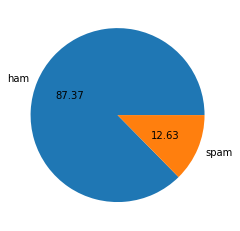

In [92]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [93]:
#data is imbalanced


In [94]:
!pip install nltk


In [95]:
import nltk

In [96]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [97]:
 df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [98]:
df['num_characters'] = df['text'].apply(len)

In [99]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [100]:
df['text'].apply(lambda x:(nltk.word_tokenize(x)))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568    [Will, ?, _, b, going, to, esplanade, fr, home...
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [101]:
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568    10
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [102]:
df[ 'num_word' ]= df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [103]:
df.head()

,target,text,num_characters,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [104]:
df.describe()

,target,num_characters,num_word
count,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.547301
std,0.332253,58.236293,13.352890
min,0.000000,2.000000,1.000000
25%,0.000000,36.000000,9.000000
50%,0.000000,60.000000,15.000000
75%,0.000000,117.000000,26.000000
max,1.000000,910.000000,220.000000


In [105]:
import seaborn as sns

In [106]:
df[df['target']== 0]['num_characters']

0       111
1        29
3        49
4        61
6        77
       ... 
5565     12
5568     37
5569     57
5570    125
5571     26
Name: num_characters, Length: 4516, dtype: int64

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

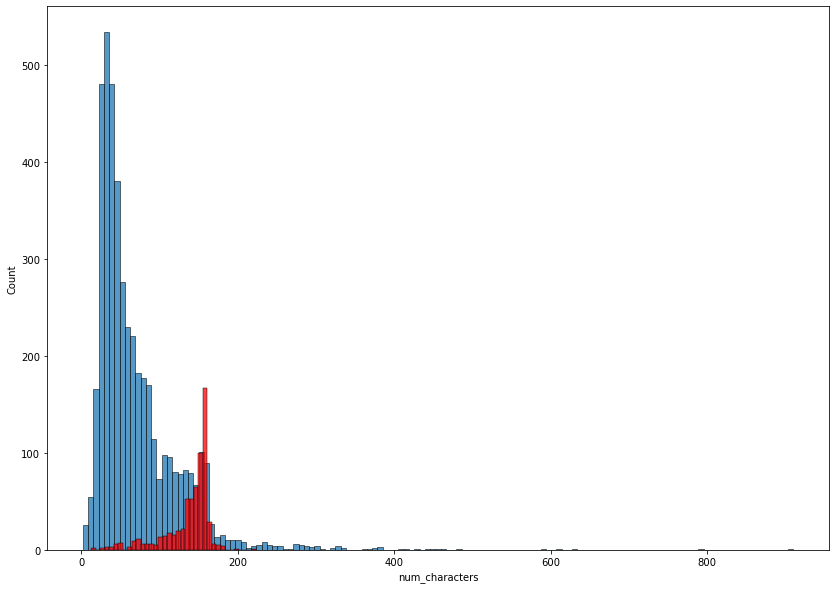

In [107]:
plt.figure(figsize=(14,10))
sns.histplot(df[df['target']== 0]['num_characters'])
sns.histplot(df[df['target']== 1]['num_characters'],color='red')

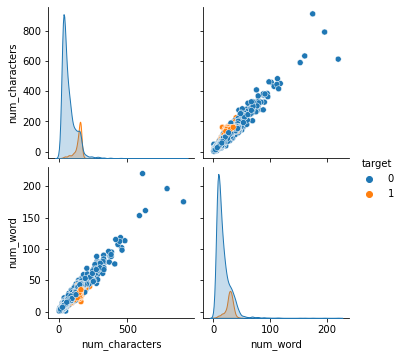

In [108]:
sns.pairplot(df,hue='target')

In [109]:
df.corr()

,target,num_characters,num_word
target,1.000000,0.384717,0.260712
num_characters,0.384717,1.000000,0.965139
num_word,0.260712,0.965139,1.000000


<AxesSubplot:>

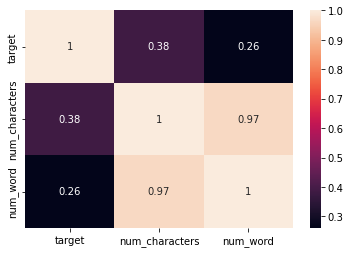

In [110]:
sns.heatmap(df.corr(),annot=True)

In [111]:
# DATA PREPROCESSING
 # LOWER CASE
    #tokenization
    #removing special characters
    #removing stop words and punctuation
    # stemming


In [112]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [122]:
def transform_text(text):
    text=text.lower()
    text= nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    for i in text:
          y.append(ps.stem(i))
            
        
    return " ".join(y)

In [124]:
transform_text('My name is chandni my age is')

NameError: name 'ps' is not defined

In [127]:
transform_text('my age is 20%%')

NameError: name 'ps' is not defined

In [128]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [129]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [130]:
df['transformed_text'] = df['text'].apply(transform_text)

In [131]:
transform_text('Hi how are you Chandni')

'hi chandni hi how are you chandni'

In [132]:
df.head()

,target,text,num_characters,num_word,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,ok lar joking wif u oni ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,u dun say early hor u c already say u dun say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,nah think goes usf lives around though nah i d...


In [133]:
df.sample(5)

,target,text,num_characters,num_word,transformed_text
2428,0,She.s find. I sent you an offline message to k...,67,16,find sent offline message know anjola find i s...
307,0,Lol yes. Our friendship is hanging on a thread...,71,17,lol yes friendship hanging thread cause u wo b...
4310,0,It so happens that there r 2waxsto do wat you ...,329,70,happens r 2waxsto wat want come ill get medica...
997,0,Not a lot has happened here. Feels very quiet....,148,36,lot happened feels quiet beth aunts charlie wo...
2203,0,soon you will have the real thing princess! Do...,65,17,soon real thing princess make wet soon you wil...


In [134]:
df[ 'num_word' ]= df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [135]:
df.head()

,target,text,num_characters,num_word,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,ok lar joking wif u oni ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,u dun say early hor u c already say u dun say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,nah think goes usf lives around though nah i d...


In [136]:
df['text'].apply(transform_text)

0       go jurong point crazy available bugis n great ...
1           ok lar joking wif u oni ok lar joke wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3       u dun say early hor u c already say u dun say ...
4       nah think goes usf lives around though nah i d...
                              ...                        
5567    2nd time tried 2 contact u pound prize 2 claim...
5568    b going esplanade fr home will b go to esplana...
5569    pity mood suggestions piti wa in mood for that...
5570    guy bitching acted like interested buying some...
5571               rofl true name rofl it true to it name
Name: text, Length: 5169, dtype: object

In [276]:
df['transformed_text']= df['text'].apply(transform_text)


In [277]:
df.head()

,target,text,num_characters,num_word,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,ok lar joking wif u oni ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,u dun say early hor u c already say u dun say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,nah think goes usf lives around though nah i d...


In [219]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [281]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))


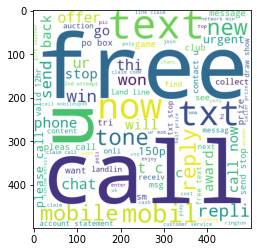

In [282]:
plt.imshow(spam_wc)

In [283]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=''))

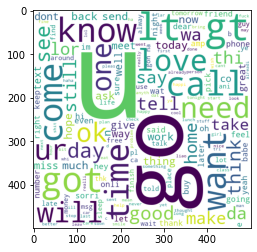

In [284]:
plt.imshow(ham_wc)

In [285]:
df[df['target']==1]['transformed_text'].tolist()

['free entry 2 wkly comp win fa cup final tkts 21st may text fa 87121 receive entry question std txt rate c apply 08452810075over18 free entri in 2 a wkli comp to win fa cup final tkt 21st may text fa to 87121 to receiv entri question std txt rate t c appli 08452810075over18',
 'freemsg hey darling 3 week word back like fun still tb ok xxx std chgs send rcv freemsg hey there darl it been 3 week now and no word back i like some fun you up for it still tb ok xxx std chg to send to rcv',
 'winner valued network customer selected receivea prize reward claim call claim code kl341 valid 12 hours winner as a valu network custom you have been select to receivea prize reward to claim call claim code kl341 valid 12 hour onli',
 'mobile 11 months u r entitled update latest colour mobiles camera free call mobile update co free 08002986030 had your mobil 11 month or more u r entitl to updat to the latest colour mobil with camera for free call the mobil updat co free on 08002986030',
 'six chances w

In [286]:
spam_corpus = []
for msg in df[df[ 'target' ] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [287]:
spam_corpus

['free',
 'entry',
 '2',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receive',
 'entry',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'apply',
 '08452810075over18',
 'free',
 'entri',
 'in',
 '2',
 'a',
 'wkli',
 'comp',
 'to',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 'to',
 '87121',
 'to',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 't',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darling',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'send',
 'rcv',
 'freemsg',
 'hey',
 'there',
 'darl',
 'it',
 'been',
 '3',
 'week',
 'now',
 'and',
 'no',
 'word',
 'back',
 'i',
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'to',
 'send',
 'to',
 'rcv',
 'winner',
 'valued',
 'network',
 'customer',
 'selected',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


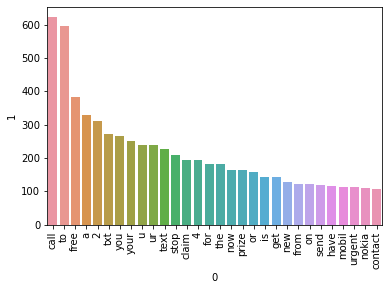

In [288]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation= 'vertical' )
plt.show()

In [291]:
ham_corpus = []
for msg in df[df[ 'target' ] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


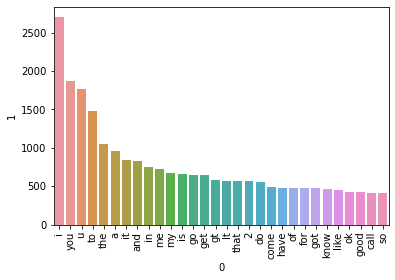

In [292]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation= 'vertical' )
plt.show()

# model building


In [293]:
df.head()

,target,text,num_characters,num_word,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,ok lar joking wif u oni ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,u dun say early hor u c already say u dun say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,nah think goes usf lives around though nah i d...


In [382]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [380]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [383]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [384]:
X.shape

(5169, 10045)

In [385]:
y = df['target'].values.ravel()

In [386]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [387]:
from sklearn.model_selection import train_test_split


In [388]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [389]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB


In [390]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [373]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [374]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9032825322391559
[[1340  132]
 [  33  201]]
0.6036036036036037


In [375]:
bnb.fit(X_train,y_train)
y_pred2 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9648300117233294
[[1465    7]
 [  53  181]]
0.9627659574468085


In [391]:
mnb.fit(X_train,y_train)
y_pred3 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9396248534583822
[[1472    0]
 [ 103  131]]
1.0


In [ ]:
import pickle
pickle.dumpp(tfidf,open('vectorizer.pk1','wb'))
pickle.dump(mnb,open('model.pk1','wb'))